In [1]:
# read & manipulate data
import pandas as pd 
import numpy as np
import tensorflow as tf

# visualisations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
%matplotlib notebook

# misc
import random as rn

# manual parameters
RANDOM_SEED = 42
TRAINING_SAMPLE = int(3053*0.8) 
VALIDATE_SIZE = 0.2

# setting random seeds for libraries to ensure reproducibility
np.random.seed(RANDOM_SEED)
rn.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [2]:
df = pd.read_csv('data.csv',index_col=[0])
df.columns = map(str.lower, df.columns)
df.head(10)

,cust_no,age_level,exp_code,source_code,0,1,2,5,9,a,...,current_c,h,o,r,company_type,avg_stock,current_stock,avg_amount,current_amount,label
0,0xDB5D3FF6B7FE584CAE62A6C482194282E627EE8F9BBB...,3,2,2,12,0,0,0,0,0,...,0,10,2,0,H,1641.500000,2000,5.571285e+04,94060.00,1
1,0x1879388A362A9CE3DB27F651C333F9BF4B66460538CF...,4,3,2,6,0,0,0,0,8,...,6,14,0,0,H,4071.428571,2000,1.752907e+05,34200.00,1
2,0x78D069BCC23EAD3DF21154E5C04838C7F942ACD422BB...,3,0,1,6,0,0,0,0,0,...,6,6,0,0,H,846.833333,26,1.538605e+04,2005.38,1
3,0x2E5D5882D3FA49E0B552A4C481F43307F854246B918B...,3,0,2,32,0,0,0,0,0,...,5,31,1,0,H,1875.000000,1000,8.463438e+04,230000.00,1
4,0x6711C00180B590285AB040EAAB3EB9D1F7704BA2B4CE...,2,0,2,8,0,0,0,0,0,...,3,6,2,0,O,26.875000,30,3.972900e+03,7758.00,1
5,0xA785349AB772B18D0DBEE3B70700A15DC00B87C5334D...,4,4,2,72,0,0,0,0,154,...,1,176,50,0,H,4164.420354,4000,2.109781e+05,178800.00,1
6,0x650750E6721E49A28D14A4867D596A09E50C16B4F72E...,4,3,2,28,0,0,0,0,38,...,4,66,0,0,H,6151.515152,69000,4.014124e+05,3049800.00,1
7,0xF7C007084CFF01A5F8495345C8EED70159EAAB659144...,4,0,2,0,0,0,0,0,20,...,0,12,8,0,O,23300.000000,60000,1.926704e+06,1894800.00,1
8,0xE5306FC17C179056A5C4E810424B9FA434EFA5F4B951...,4,0,2,292,0,0,0,0,0,...,0,292,0,0,H,1595.890411,4000,3.693575e+04,209920.00,1
9,0x828358417FE748E5AA8D76AF8C547B45F02A34D65394...,5,3,2,0,0,0,0,0,0,...,0,0,0,0,H,0.000000,0,0.000000e+00,0.00,1


# Data Preprocessing

In [3]:
df = df.replace(to_replace ="A",value =3) 
df = df.replace(to_replace ="H",value =0) 
df = df.replace(to_replace ="O",value =1)
df = df.replace(to_replace ="R",value =2) 

In [4]:
df = df.drop(['cust_no'], axis=1)
df.fillna ( 0 , inplace = True )

In [5]:
# df = df.drop('r', axis=1)


# df = df.drop('source_code', axis=1)
df = df.drop('1', axis=1)
df = df.drop('2', axis=1)
df = df.drop('5', axis=1)
df = df.drop('9', axis=1)
df = df.drop('c0', axis=1)
df = df.drop('c1', axis=1)
df = df.drop('c2', axis=1)
df = df.drop('c3', axis=1)
df = df.drop('c4', axis=1)
df = df.drop('c5', axis=1)

# df = df.drop('c6', axis=1)

In [6]:
df['avg_amount'] = np.log10(df.avg_amount + 0.00001)
df['current_amount'] = np.log10(df.current_amount + 0.00001)
df = df.drop('avg_amount', axis=1)
df = df.drop('current_amount', axis=1)

df['avg_stock'] = np.log10(df.avg_stock + 0.00001)
df['current_stock'] = np.log10(df.current_stock + 0.00001)
# df = df.drop('avg_stock', axis=1)
# df = df.drop('current_stock', axis=1)

df.fillna ( 0 , inplace = True )

In [7]:
df.head()

,age_level,exp_code,source_code,0,a,trans_type,c6,current_c,h,o,r,company_type,avg_stock,current_stock,label
0,3,2,2,12,0,0,0,0,10,2,0,0,3.215241,3.301030,1
1,4,3,2,6,8,0,4,6,14,0,0,0,3.609747,3.301030,1
2,3,0,1,6,0,0,6,6,6,0,0,0,2.927798,1.414974,1
3,3,0,2,32,0,0,17,5,31,1,0,0,3.273001,3.000000,1
4,2,0,2,8,0,0,0,3,6,2,0,1,1.429349,1.477121,1


In [8]:
breach = df[df.label == 1]
non_breach = df[df.label == 0]

column_names = list(df.drop('label', axis=1).columns)

features, labels = df.drop('label', axis=1).values, df.label.values

# T-SNE

In [9]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

def tsne_scatter(features, labels, dimensions=2, save_as='graph.png'):
    if dimensions not in (2, 3):
        raise ValueError('tsne_scatter can only plot in 2d or 3d (What are you? An alien that can visualise >3d?). Make sure the "dimensions" argument is in (2, 3)')

    # t-SNE dimensionality reduction
    features_embedded = TSNE(n_components=dimensions, random_state=RANDOM_SEED).fit_transform(features)
    
    # initialising the plot
    fig, ax = plt.subplots(figsize=(8,8))
    
    # counting dimensions
    if dimensions == 3: ax = fig.add_subplot(111, projection='3d')

    # plotting data
    ax.scatter(
        *zip(*features_embedded[np.where(labels==1)]),
        marker='o',
        color='r',
        s=2,
        alpha=0.7,
        label='breach'
    )
    ax.scatter(
        *zip(*features_embedded[np.where(labels==0)]),
        marker='o',
        color='g',
        s=2,
        alpha=0.3,
        label='non_breach'
    )

    # storing it to be displayed later
    plt.legend(loc='best')
    plt.savefig(save_as);
    plt.show;

In [10]:
tsne_scatter(features, labels, dimensions=2, save_as='T-SNE_initial_2d.png')
tsne_scatter(features, labels, dimensions=3, save_as='T-SNE_initial_3d.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Dataset

In [11]:
print(f"""Shape of the datasets:
    non_breach (rows, cols) = {non_breach.shape}
    breach (rows, cols) = {breach.shape}""")

Shape of the datasets:
    non_breach (rows, cols) = (2962, 15)
    breach (rows, cols) = (91, 15)


In [12]:
# shuffle our training set
non_breach = non_breach.sample(frac=1).reset_index(drop=True)

# training set: exlusively non-breach transactions
X_train = non_breach.iloc[:TRAINING_SAMPLE].drop('label', axis=1)

# testing  set: the remaining non-breach + all the breach 
X_test = non_breach.iloc[TRAINING_SAMPLE:].append(breach).sample(frac=1)

In [13]:
print(f"""Our testing set is composed as follows:\n{X_test.label.value_counts()}""")

Our testing set is composed as follows:
0    520
1     91
Name: label, dtype: int64


In [14]:
#split train and validation
from sklearn.model_selection import train_test_split

# train // validate - no labels since they're all clean anyway
X_train, X_validate = train_test_split(X_train, 
                                       test_size=VALIDATE_SIZE, 
                                       random_state=RANDOM_SEED)

# manually splitting the labels from the test df
X_test, y_test = X_test.drop('label', axis=1).values, X_test.label.values

In [15]:
print(f"""Shape of the datasets:
    training (rows, cols) = {X_train.shape}
    validate (rows, cols) = {X_validate.shape}
    testing  (rows, cols) = {X_test.shape}""")

Shape of the datasets:
    training (rows, cols) = (1953, 14)
    validate (rows, cols) = (489, 14)
    testing  (rows, cols) = (611, 14)


## normalize

In [16]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.pipeline import Pipeline

# configure our pipeline
pipeline = Pipeline([('normalizer', Normalizer()),
                     ('scaler', MinMaxScaler())])

In [17]:
pipeline.fit(X_train)

Pipeline(steps=[('normalizer', Normalizer()), ('scaler', MinMaxScaler())])

In [18]:
# transform the training and validation data with these parameters
X_train_transformed = pipeline.transform(X_train)
X_validate_transformed = pipeline.transform(X_validate)

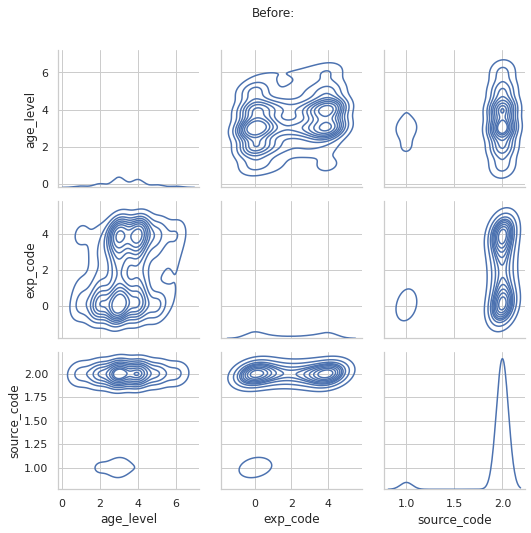

In [19]:
%matplotlib inline
g = sns.PairGrid(X_train.iloc[:,:3].sample(500, random_state=RANDOM_SEED))
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Before:')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot);

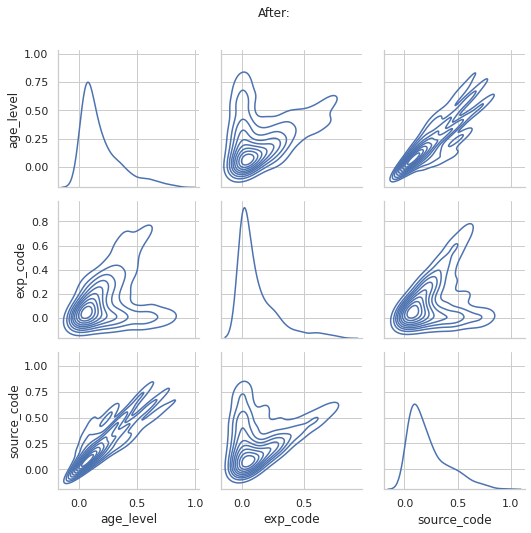

In [20]:
g = sns.PairGrid(pd.DataFrame(X_train_transformed, columns=column_names).iloc[:,:3].sample(500, random_state=RANDOM_SEED))
plt.subplots_adjust(top=0.9)
g.fig.suptitle('After:')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot);

# Train

In [1]:
%load_ext tensorboard 
%tensorboard --logdir logs

## Model

In [22]:
# data dimensions // hyperparameters 
input_dim = X_train_transformed.shape[1]
BATCH_SIZE = 128
EPOCHS = 650

# # https://keras.io/layers/core/
# autoencoder = tf.keras.models.Sequential([
    
#     # deconstruct / encode
#     tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )), 
#     tf.keras.layers.Dense(16, activation='elu'),
#     tf.keras.layers.Dense(8, activation='elu'),
#     tf.keras.layers.Dense(4, activation='elu'),
#     tf.keras.layers.Dense(2, activation='elu'),
    
#     # reconstruction / decode
#     tf.keras.layers.Dense(4, activation='elu'),
#     tf.keras.layers.Dense(8, activation='elu'),
#     tf.keras.layers.Dense(16, activation='elu'),
#     tf.keras.layers.Dense(input_dim, activation='elu')
    
# ])



# autoencoder = tf.keras.models.Sequential([
    
#     # deconstruct / encode
#     tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )), 
#     tf.keras.layers.Dense(64, activation='elu'),
#     tf.keras.layers.Dense(32, activation='elu'),
#     tf.keras.layers.Dense(16, activation='elu'),
#     tf.keras.layers.Dense(8, activation='elu'),
    
#     # reconstruction / decode
#     tf.keras.layers.Dense(16, activation='elu'),
#     tf.keras.layers.Dense(32, activation='elu'),
#     tf.keras.layers.Dense(64, activation='elu'),
#     tf.keras.layers.Dense(input_dim, activation='elu')
    
# ])

autoencoder = tf.keras.models.Sequential([
    
    # deconstruct / encode
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )), 
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    # reconstruction / decode
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu')
    
])
# https://keras.io/api/models/model_training_apis/
autoencoder.compile(optimizer="adam", 
                    loss="mse",
                    metrics=["acc"])

# print an overview of our model
autoencoder.summary();

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 14)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1920      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                1

In [ ]:
from datetime import datetime

# current date and time
yyyymmddHHMM = datetime.now().strftime('%Y%m%d%H%M')

# new folder for a new run
log_subdir = f'{yyyymmddHHMM}_batch{BATCH_SIZE}_layers{len(autoencoder.layers)}'

# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=50,
    verbose=1, 
    mode='min',
    restore_best_weights=True
)

save_model = tf.keras.callbacks.ModelCheckpoint(
    filepath='autoencoder_best_weights.hdf5',
    save_best_only=True,
    monitor='val_loss',
    verbose=0,
    mode='min'
)

tensorboard = tf.keras.callbacks.TensorBoard(
    f'logs/{log_subdir}',
    batch_size=BATCH_SIZE,
    update_freq='batch'
)

# callbacks argument only takes a list
cb = [early_stop, save_model, tensorboard]

## start train

In [ ]:
history = autoencoder.fit(
    X_train_transformed, X_train_transformed,
    shuffle=True,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=cb,
    validation_data=(X_validate_transformed, X_validate_transformed)
)
autoencoder.save('autoencoder.h5')

## load model

In [23]:
autoencoder.load_weights('autoencoder.h5')

# Test

In [24]:
# transform the test set with the pipeline fitted to the training set
X_test_transformed = pipeline.transform(X_test)

# pass the transformed test set through the autoencoder to get the reconstructed result
reconstructions = autoencoder.predict(X_test_transformed)

In [25]:
mse = np.mean(np.power(X_test_transformed - reconstructions, 2), axis=1)

In [26]:
def mad_score(points):
    m = np.median(points)
    ad = np.abs(points - m)
    mad = np.median(ad)
    print(m)
    
    return 0.6745 * ad / mad

# mse = mad_score(mse)

## curve

In [27]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

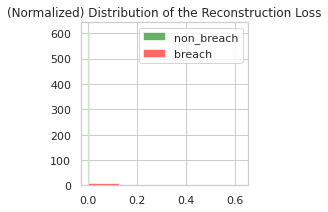

In [28]:
%matplotlib inline
non_breach = mse[y_test==0]
breach = mse[y_test==1]

fig, ax = plt.subplots(figsize=(3,3))

ax.hist(non_breach, bins=5, density=True, label="non_breach", alpha=.6, color="green")
ax.hist(breach, bins=5, density=True, label="breach", alpha=.6, color="red")

plt.title("(Normalized) Distribution of the Reconstruction Loss")
plt.legend()
plt.show()

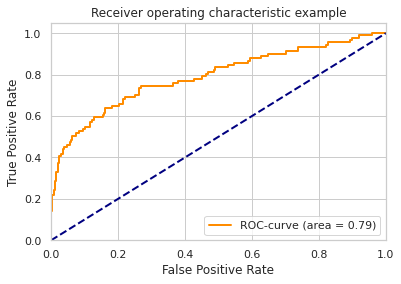

In [29]:
import numpy as np
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, mse)
roc_auc = auc(fpr, tpr)

import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt

fig = plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC-curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
fig.savefig('roc.png')
plt.show()

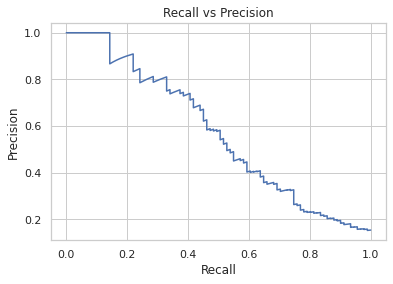

In [30]:
precision, recall, th = precision_recall_curve(y_test, mse)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

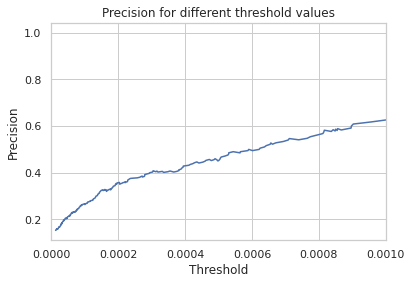

In [33]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.xlim((0,0.001))
plt.show()

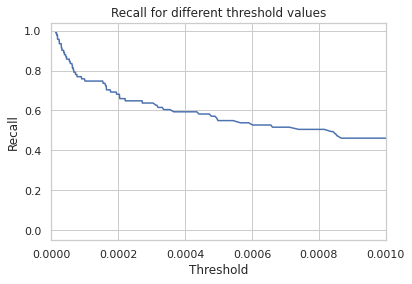

In [32]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.xlim((0,0.001))
plt.show()

## THRESHOLD

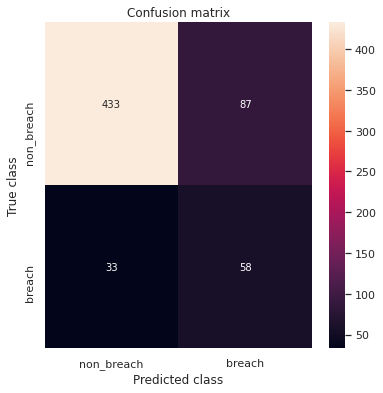

In [34]:
threshold = 0.0003
y_pred = [1 if e > threshold else 0 for e in mse]
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=['non_breach','breach'], yticklabels=['non_breach','breach'], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [35]:
(tn, fp, 
 fn, tp) = conf_matrix.flatten()

print(f"""The classifications using the MAD method with threshold={threshold} 

% of transactions labeled as breach that were correct (precision): {tp}/({fp}+{tp}) = {tp/(fp+tp):.2%}
% of breach transactions were caught succesfully (recall):    {tp}/({fn}+{tp}) = {tp/(fn+tp):.2%}""")

The classifications using the MAD method with threshold=0.0003 

% of transactions labeled as breach that were correct (precision): 58/(87+58) = 40.00%
% of breach transactions were caught succesfully (recall):    58/(33+58) = 63.74%


# Fearture Importance

keras is no longer supported, please use tf.keras instead.


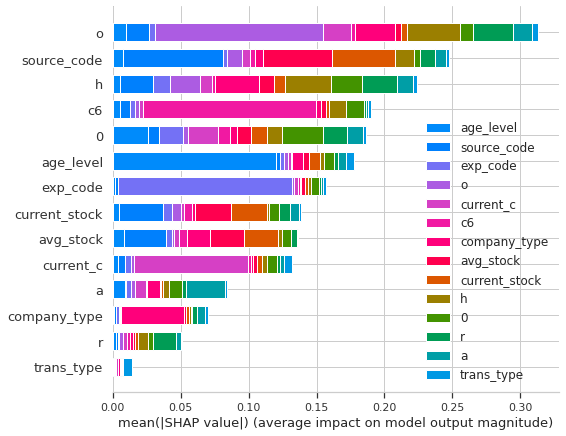

In [36]:
import shap
import matplotlib.pyplot as plt
features = list(df.columns)
background = X_train_transformed[np.random.choice(X_train_transformed.shape[0], 1000, replace=False)]# we use the first 100 training examples as our background dataset to integrate over
explainer = shap.DeepExplainer(autoencoder,  background)
shap_values = explainer.shap_values(background)
shap.summary_plot(shap_values, background, plot_type="bar",feature_names = features, class_names = features ,show=False)
plt.savefig("feature_importance.png")

# ref

https://medium.com/@curiousily/credit-card-fraud-detection-using-autoencoders-in-keras-tensorflow-for-hackers-part-vii-20e0c85301bd
https://www.kaggle.com/robinteuwens/anomaly-detection-with-auto-encoders  